In [1]:
from astroquery.gaia import Gaia
# Gaia.MAIN_GAIA_TABLE = "gaiadr2.gaia_source"  # Select Data Release 2
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"  # Reselect Data Release 3, default


In [33]:
from astroquery.gaia import Gaia
import pandas as pd

# Query a region of the sky or specific magnitude range
job = Gaia.launch_job("SELECT TOP 10000 source_id, ra, dec, parallax, phot_g_mean_mag, bp_rp FROM gaiadr3.gaia_source WHERE phot_g_mean_mag < 15")
result = job.get_results()

# Convert to DataFrame
df = result.to_pandas()
print(df.head())


             SOURCE_ID          ra        dec   parallax  phot_g_mean_mag  \
0  1576683529448755328  193.508178  55.959785        NaN         1.731607   
1  6560604777055249536  332.059078 -46.961617        NaN         1.773280   
2  1510374147844219904  206.884327  49.313202        NaN         1.881019   
3  3377166289889430656   95.740374  22.513099        NaN         1.881368   
4   418551920284673408   10.127242  56.537189  14.090976         1.942524   

      bp_rp  
0  0.338367  
1  0.252056  
2  0.165524  
3  1.878384  
4  1.143484  


In [36]:
df["bp_rp"].describe()


count    10000.000000
mean         1.103637
std          0.954040
min         -0.418007
25%          0.288076
50%          1.136273
75%          1.588149
max          7.383103
Name: bp_rp, dtype: float64

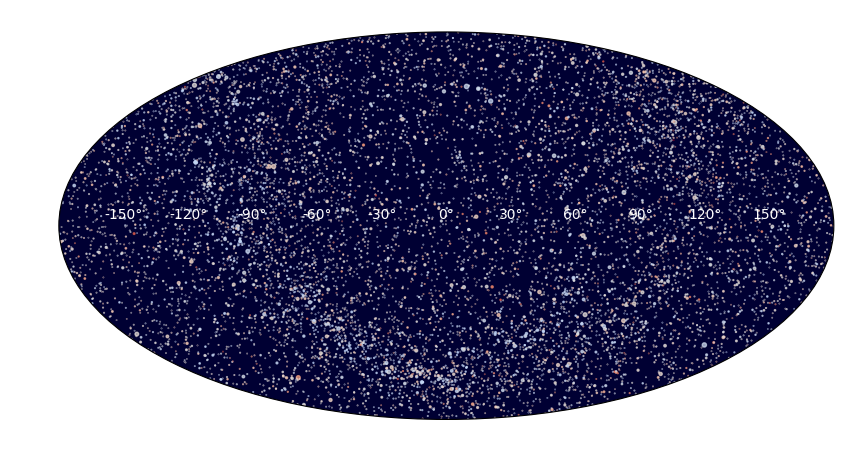

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure
plt.figure(figsize=(10, 6))

# Using Mollweide projection for RA/DEC
ra_rad = np.radians(df['ra'] - 180)  # Center the map at RA = 180°
dec_rad = np.radians(df['dec'])

# Adjust star sizes with exponential scaling
size = np.exp(4 - df['phot_g_mean_mag'])  # Exponential scaling for sizes

# Use the 'bp_rp' values to map colors of stars (use colormap that transitions from blue to red)
cmap = plt.get_cmap('coolwarm')  # A colormap going from blue to red
norm = plt.Normalize(vmin=-5, vmax=7)  # Normalize 'bp_rp' values for color mapping

# Create the subplot with Mollweide projection
ax = plt.subplot(111, projection="mollweide")

# Set the face color of the projection (ellipse region) to deep blue
ax.set_facecolor('#000033')

# Plot stars using scatter
sc = ax.scatter(ra_rad, dec_rad, s=size, c=df['bp_rp'], cmap=cmap, norm=norm, alpha=0.75)

# Add labels and title
ax.set_xlabel('Right Ascension (degrees)', color='white')
ax.set_ylabel('Declination (degrees)', color='white')
ax.set_title('Star Map from Gaia Data (Mollweide Projection)', color='white')

# Colorbar for the magnitude
# cb = plt.colorbar(sc)
# cb.set_label('Magnitude (G)', color='white')

# Adjust colorbar ticks and labels to white
# cb.ax.yaxis.set_tick_params(color='white')
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white')

# Adjust axis labels and ticks to white to contrast with the dark projection background
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='both', colors='white')

# Show the plot
plt.show()
